## Diagnosing breast cancer with k-NN
We will use the "Breast Cancer Wisconsin Diagnostic" dataset from the UCI Machine Learning Repository, which is available at http://archive.ics.uci.edu/ml.

The breast cancer data includes 569 examples of cancer biopsies, each with 32 features. One feature is an identification number, another is the cancer diagnosis, and 30 are numeric-valued laboratory measurements. The diagnosis is coded as M to indicate malignant or B to indicate benign.

### Import data file

In [1]:
# Local directory - use your own!!!!!!
setwd("/Users/joseadiazg/Desktop/MASTER CIENCIA DE DATOS/introduccion-ciencia-datos/Clasificacion")

In [2]:
# Load data
wbcd <- read.csv("./datasets/wisc_bc_data.csv", stringsAsFactors = FALSE)
# Examine the structure of the wbcd data frame
str(wbcd)
wbcd

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : chr  "B" "B" "B" "B" ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  1

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
87139402,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,⋯,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
8910251,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,⋯,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,⋯,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,⋯,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,⋯,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,⋯,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,⋯,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,⋯,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,⋯,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552
89827,B,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,⋯,11.92,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080


### Preprocess data

In [3]:
# Drop the id feature
wbcd <- wbcd[,-1]

In [4]:
# Table of diagnosis
table(wbcd$diagnosis)


  B   M 
357 212 

In [5]:
# Recode diagnosis as a factor
wbcd$diagnosis <- factor(wbcd$diagnosis, levels = c("B", "M"), labels = c("Benign", "Malignant"))
table(wbcd$diagnosis)


   Benign Malignant 
      357       212 

In [6]:
# Table or proportions with more informative labels
round(prop.table(table(wbcd$diagnosis)) * 100, digits = 1)


   Benign Malignant 
     62.7      37.3 

In [7]:
# Summarize three numeric features
summary(wbcd[,c("radius_mean", "area_mean", "smoothness_mean")])

  radius_mean       area_mean      smoothness_mean  
 Min.   : 6.981   Min.   : 143.5   Min.   :0.05263  
 1st Qu.:11.700   1st Qu.: 420.3   1st Qu.:0.08637  
 Median :13.370   Median : 551.1   Median :0.09587  
 Mean   :14.127   Mean   : 654.9   Mean   :0.09636  
 3rd Qu.:15.780   3rd Qu.: 782.7   3rd Qu.:0.10530  
 Max.   :28.110   Max.   :2501.0   Max.   :0.16340  

  radius_mean        area_mean       smoothness_mean   
 Min.   :-2.0279   Min.   :-1.4532   Min.   :-3.10935  
 1st Qu.:-0.6888   1st Qu.:-0.6666   1st Qu.:-0.71034  
 Median :-0.2149   Median :-0.2949   Median :-0.03486  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.4690   3rd Qu.: 0.3632   3rd Qu.: 0.63564  
 Max.   : 3.9678   Max.   : 5.2459   Max.   : 4.76672  

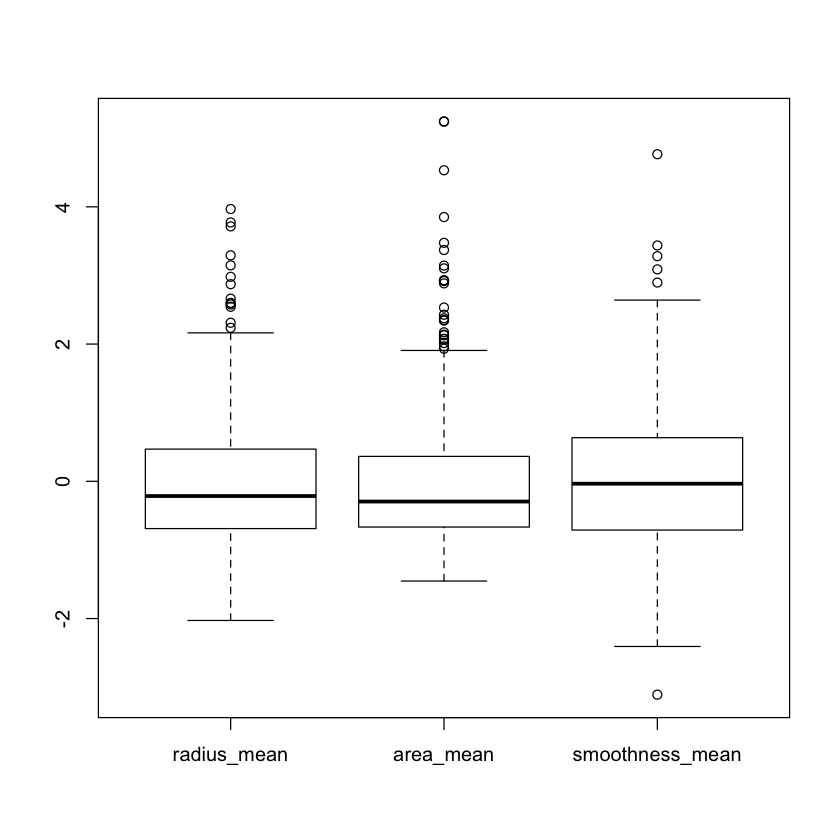

In [8]:
# Normalize the wbcd data
wbcd_n <- as.data.frame(lapply(wbcd[,2:31], scale, center = TRUE, scale = TRUE))
# Confirm that normalization worked
summary(wbcd_n[,c("radius_mean", "area_mean", "smoothness_mean")])
boxplot(wbcd_n[,c("radius_mean", "area_mean", "smoothness_mean")])

### Visualize data

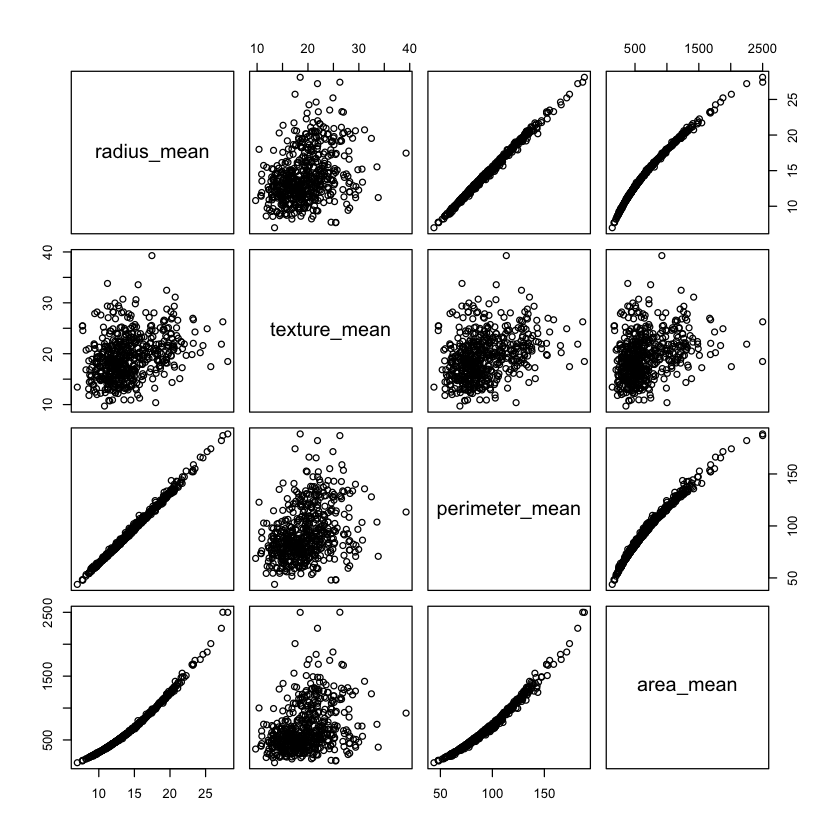

In [9]:
plot(wbcd[,2:5])

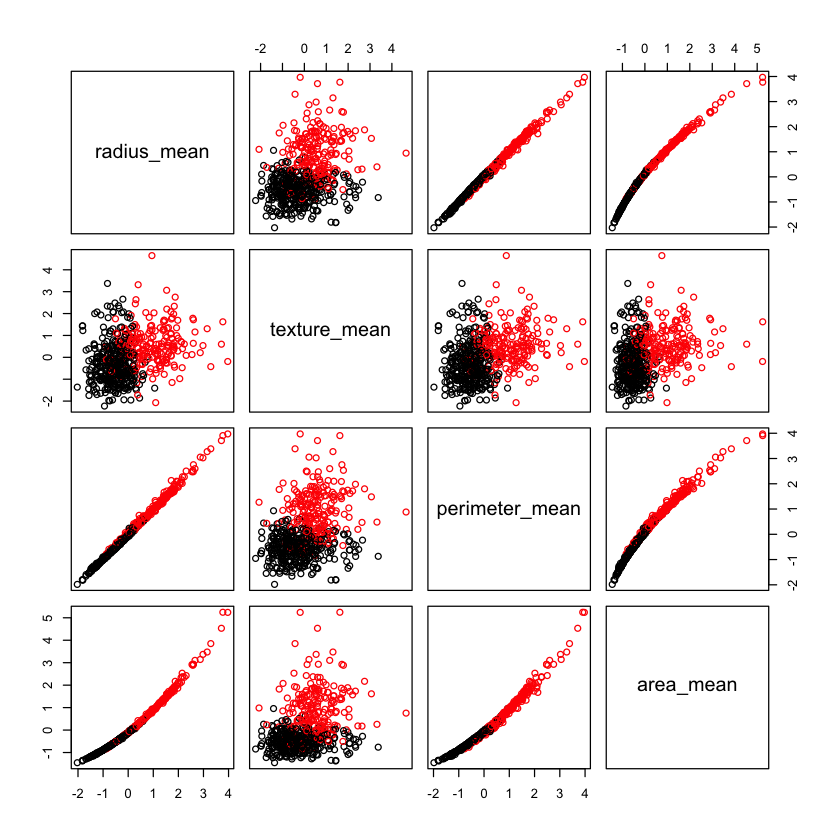

In [10]:
plot(wbcd_n[,1:4], col=wbcd[,1])

In [11]:
cor(wbcd[,2:5])

,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.0000000,0.3237819,0.9978553,0.9873572
texture_mean,0.3237819,1.0000000,0.3295331,0.3210857
perimeter_mean,0.9978553,0.3295331,1.0000000,0.9865068
area_mean,0.9873572,0.3210857,0.9865068,1.0000000


In [12]:
cor(wbcd_n[,1:4])

,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.0000000,0.3237819,0.9978553,0.9873572
texture_mean,0.3237819,1.0000000,0.3295331,0.3210857
perimeter_mean,0.9978553,0.3295331,1.0000000,0.9865068
area_mean,0.9873572,0.3210857,0.9865068,1.0000000


### Create training and test datasets

In [13]:
# Create training and test data
shuffle_ds <- sample(dim(wbcd_n)[1])
eightypct <- (dim(wbcd_n)[1] * 80) %/% 100
wbcd_train <- wbcd_n[shuffle_ds[1:eightypct], ]
wbcd_test <- wbcd_n[shuffle_ds[(eightypct+1):dim(wbcd_n)[1]], ]

# Create labels for training and test data
wbcd_train_labels <- wbcd[shuffle_ds[1:eightypct], 1]
wbcd_test_labels <- wbcd[shuffle_ds[(eightypct+1):dim(wbcd_n)[1]], 1]

### Training a model on the data - By hand...

In [14]:
# Load the "class" library
library(class)
wbcd_test_pred <- knn(train = wbcd_train, test = wbcd_test, cl = wbcd_train_labels, k=21)
wbcd_test_pred

[1] Benign    Malignant Benign    Benign    Benign    Benign    Malignant
  [8] Benign    Benign    Malignant Benign    Malignant Malignant Benign   
 [15] Malignant Benign    Benign    Benign    Benign    Malignant Benign   
 [22] Malignant Benign    Benign    Malignant Benign    Benign    Benign   
 [29] Benign    Benign    Benign    Benign    Malignant Malignant Benign   
 [36] Malignant Benign    Benign    Malignant Malignant Benign    Malignant
 [43] Malignant Malignant Malignant Benign    Benign    Benign    Malignant
 [50] Malignant Malignant Benign    Malignant Benign    Malignant Benign   
 [57] Benign    Benign    Benign    Malignant Malignant Malignant Benign   
 [64] Benign    Benign    Benign    Benign    Malignant Benign    Benign   
 [71] Malignant Benign    Benign    Malignant Benign    Malignant Malignant
 [78] Malignant Benign    Malignant Malignant Benign    Benign    Benign   
 [85] Benign    Malignant Benign    Malignant Benign    Benign    Benign   
 [92] Benign    Benign    Benign    Benign    Benign    Malignant Benign   
 [99] Malignant Benign    Benign    Benign    Benign    Benign    Benign   
[106] Benign    Malignant Benign    Benign    Benign    Benign    Malignant
[113] Benign    Benign   
Levels: Benign Malignant

In [15]:
# Evaluating model performance
table(wbcd_test_pred,wbcd_test_labels)

              wbcd_test_labels
wbcd_test_pred Benign Malignant
     Benign        73         1
     Malignant      0        40

### Training a model on the data - Using caret...

In [19]:
require(caret)
install.packages('e1071', dependencies=TRUE)
knnModel <- train(x = wbcd_train, y = wbcd_train_labels, method = "knn")
class(knnModel)
knnModel

also installing the dependencies ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’




The downloaded binary packages are in
	/var/folders/hx/tzq4mbtj1pj4gvxnfzdmx14h0000gn/T//Rtmp942APS/downloaded_packages


[1] "train"

k-Nearest Neighbors 

455 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 455, 455, 455, 455, 455, 455, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9507769  0.8940371
  7  0.9545571  0.9021523
  9  0.9545490  0.9017466

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 7.

In [20]:
knnModel <- train(wbcd_train, wbcd_train_labels, method="knn", metric="Accuracy", tuneGrid = data.frame(.k=1:15))
knnModel

k-Nearest Neighbors 

455 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 455, 455, 455, 455, 455, 455, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9454234  0.8841700
   2  0.9423187  0.8773914
   3  0.9466632  0.8863605
   4  0.9495056  0.8922466
   5  0.9497898  0.8926756
   6  0.9516396  0.8967255
   7  0.9522010  0.8978514
   8  0.9524595  0.8983405
   9  0.9516349  0.8965305
  10  0.9508625  0.8947832
  11  0.9501385  0.8931796
  12  0.9467920  0.8857161
  13  0.9467865  0.8858310
  14  0.9475995  0.8873180
  15  0.9463937  0.8847483

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 8.

In [26]:
require(caret)
knnModel <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"))
class(knnModel)
knnModel

[1] "train"

k-Nearest Neighbors 

455 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

Pre-processing: centered (30), scaled (30) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 455, 455, 455, 455, 455, 455, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9465341  0.8857532
  7  0.9469161  0.8863218
  9  0.9472361  0.8867027

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was k = 9.

### Predicting using the model

In [22]:
knnPred <- predict(knnModel, newdata = wbcd[shuffle_ds[(eightypct+1):dim(wbcd_n)[1]], -1])
knnPred

[1] Benign    Malignant Benign    Benign    Benign    Benign    Malignant
  [8] Benign    Benign    Malignant Benign    Malignant Malignant Benign   
 [15] Malignant Benign    Benign    Benign    Benign    Malignant Benign   
 [22] Malignant Benign    Benign    Malignant Benign    Benign    Benign   
 [29] Benign    Benign    Benign    Benign    Malignant Malignant Benign   
 [36] Malignant Benign    Benign    Malignant Malignant Benign    Malignant
 [43] Malignant Malignant Malignant Benign    Benign    Benign    Malignant
 [50] Malignant Malignant Benign    Malignant Benign    Malignant Benign   
 [57] Benign    Benign    Benign    Malignant Malignant Malignant Benign   
 [64] Benign    Benign    Benign    Benign    Malignant Benign    Benign   
 [71] Malignant Benign    Benign    Malignant Benign    Malignant Malignant
 [78] Malignant Benign    Malignant Malignant Benign    Benign    Benign   
 [85] Benign    Malignant Benign    Malignant Benign    Benign    Benign   
 [92] Benign    Benign    Benign    Benign    Benign    Malignant Benign   
 [99] Malignant Benign    Benign    Benign    Benign    Benign    Benign   
[106] Benign    Malignant Benign    Benign    Benign    Benign    Malignant
[113] Benign    Benign   
Levels: Benign Malignant

In [23]:
postResample(pred = knnPred, obs = wbcd[shuffle_ds[(eightypct+1):dim(wbcd_n)[1]], 1])

Accuracy     Kappa 
0.9912281 0.9808532

## Exercise 1
Try with different k choices and do a quick comparison. You can draw a plot to show the results.


Vamos a crear modelos para distintos valores de K y luego los compararemos usando caret. 

Ejecutaremos el modelo 10 veces para cada K para poder tener más datos y efectuar comparaciones mejores. 

In [36]:
control <- trainControl(method="repeatedcv", number=10, repeats=10)

In [37]:
knnModelk1 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=1))
knnModelk2 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=2))
knnModelk3 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=3))
knnModelk4 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=4))
knnModelk5 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=5))
knnModelk6 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=6))
knnModelk7 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=7))
knnModelk8 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=8))
knnModelk9 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=9))
knnModelk10 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=10))
knnModelk11 <- train(x = wbcd[shuffle_ds[1:eightypct],-1], y = wbcd[shuffle_ds[1:eightypct],1], method = "knn", preProc = c("center", "scale"), trControl=control, tuneGrid = data.frame(.k=11))

In [38]:
results <- resamples(list(K1=knnModelk1, K2=knnModelk2, K3=knnModelk3, K4=knnModelk4, K5=knnModelk5, K6=knnModelk6,
                         K7=knnModelk7, K8=knnModelk8, K9=knnModelk9, K10=knnModelk10, K11=knnModelk11))

Ahora haciendo uso de results podemos ver la distribución de los valores en accuracy y kappa para cada uno de los valores de K ejecutados. 

In [39]:
summary(results)



Call:
summary.resamples(object = results)

Models: K1, K2, K3, K4, K5, K6, K7, K8, K9, K10, K11 
Number of resamples: 100 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
K1  0.8888889 0.9333333 0.9555556 0.9489828 0.9777778    1    0
K2  0.8260870 0.9333333 0.9555556 0.9453170 0.9777778    1    0
K3  0.8695652 0.9347826 0.9565217 0.9597868 0.9782609    1    0
K4  0.8222222 0.9555556 0.9565217 0.9586900 0.9778986    1    0
K5  0.8888889 0.9358233 0.9565217 0.9597759 0.9782609    1    0
K6  0.8888889 0.9347826 0.9565217 0.9617465 0.9782609    1    0
K7  0.8913043 0.9555556 0.9676123 0.9652737 0.9782609    1    0
K8  0.8695652 0.9555556 0.9777778 0.9653164 0.9782609    1    0
K9  0.8888889 0.9555556 0.9777778 0.9641636 0.9782609    1    0
K10 0.8913043 0.9555556 0.9569843 0.9639740 0.9782609    1    0
K11 0.8695652 0.9507092 0.9777778 0.9623947 0.9782609    1    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
K1  0.7578947 0.8560859 0

Ahora, realizamos algunos gráficos para poder ver mejor los resultados:

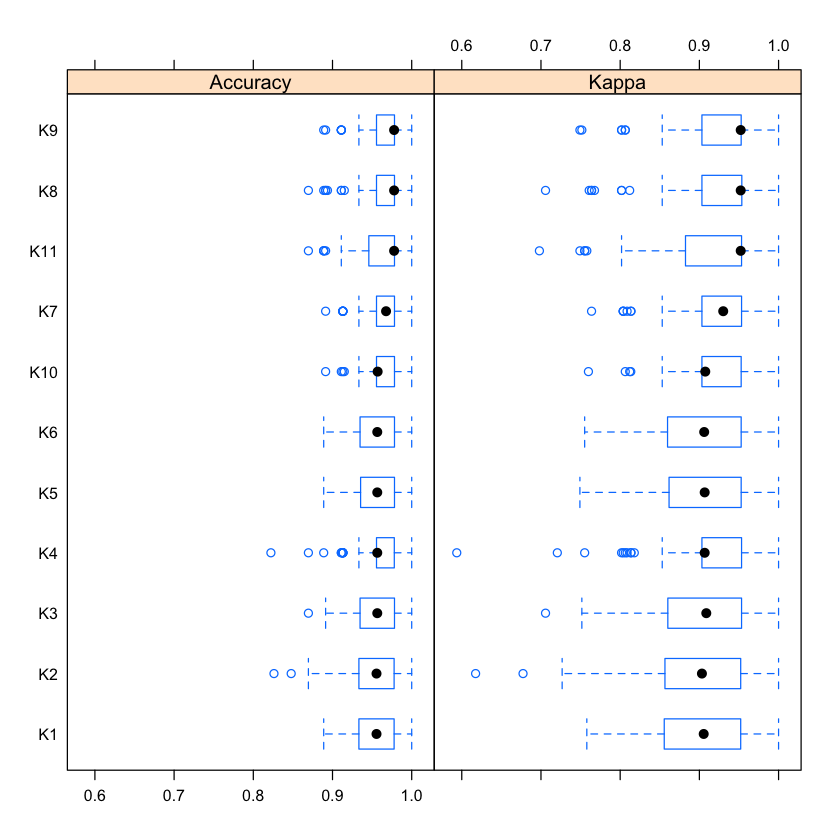

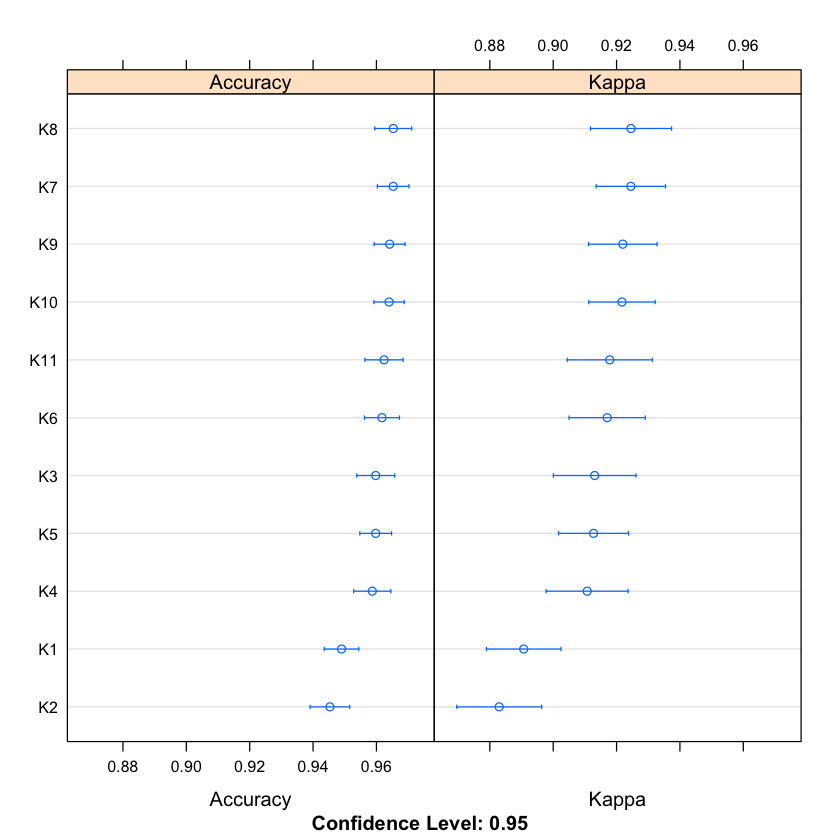

In [40]:
bwplot(results)
# dot plots of results
dotplot(results)

En este caso todos han llegado a un total de aciertos, lo que deja ver que quizá al aumentar el número de repeticiones hemos sobre entrenado el modelo. Igualmente, ls gráficos son claros, por ejemplo podemos ver outliers sobre todo en los valores de K pares, lo que indica que estos son más propensos a dar valores más bajos de accuracy en alguna de las pruebas realizadas. Respecto a esto, tambien podemos ver como los valores mínimos en accuracy son obtenidos por valores de K pares, obteniendo en la mayoria de los casos valores mucho mejores tanto de Accuracy como de Kappa en los K impares.